# 2 - Download using pvdaq_access

Similar to tutorial 1, but here we use pvdaq_access functions which hide a lot of the aws lines inside, simplifying the data download.

**Objectives:**
* <a href='#step1'>1. Setup</a>
* <a href='#step2'>2. Download data</a>
* <a href='#step3'>3. Load and plot data from the file</a>

<a id='step1'></a>

## 1. Setup

In [ ]:
# if running on google colab, uncomment the next line and execute this cell to install the dependencies and prevent "ModuleNotFoundError" in later cells:
!pip install pvdaq_access

In [1]:
import pvdaq_access
import pathlib  # this might not be needed as working on same directory as data here?

# This information helps with debugging and getting support :)
import sys, platform, os
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("pvdaq_access version ", pvdaq_access.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pvdaq_access version  0+untagged.26.gffc978d.dirty


Let's make a folder to save the data in 

In [2]:
testfolder = 'SolarBountyDataPrize_DATA'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

path = testfolder

<a id='step2'></a>

## 2. Donwload the data

In [3]:
print (" ..: Starting data access script for PVDAQ OEDI datasets :..")

system = '2107'
file_type = 'csv' # options: csv or parquet
SolarDataBountyPrize = True

if SolarDataBountyPrize:
    #Handle Solar Data Bounty Prize archives
    pvdaq_access.downloadSolarPrizeData(system, path, file_type=file_type)

else: #Normal PVDAQ archives
    if file_type == 'csv':
        pvdaq_access.downloadData(system, path, file_type=file_type)
    elif file_type == 'parquet':
        pvdaq_access.downloadData(system, path, file_type=file_type)

        #Create single file from data (all files are chunked by day)
    pvdaq_access.concatenateData(system, path)

 ..: Starting data access script for PVDAQ OEDI datasets :..
File SolarBountyDataPrize_DATA\2107_electrical_data.csv downloaded successfully.
File SolarBountyDataPrize_DATA\2107_environment_data.csv downloaded successfully.
File SolarBountyDataPrize_DATA\2107_irradiance_data.csv downloaded successfully.
File SolarBountyDataPrize_DATA\2107_meter_15m_data.csv downloaded successfully.


<a id='step3'></a>

## 3. Load and plot the data

In [4]:
import pandas as pd
#Read in file

df = pd.read_csv(os.path.join(path, '2107_irradiance_data.csv'))
df.set_index('measured_on', inplace=True)
#extract file info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531019 entries, 2017-11-01 07:10:00 to 2023-11-01 23:55:00
Data columns (total 1 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   poa_irradiance_o_149574  531019 non-null  float64
dtypes: float64(1)
memory usage: 8.1+ MB


Perform a quick plot to examine data

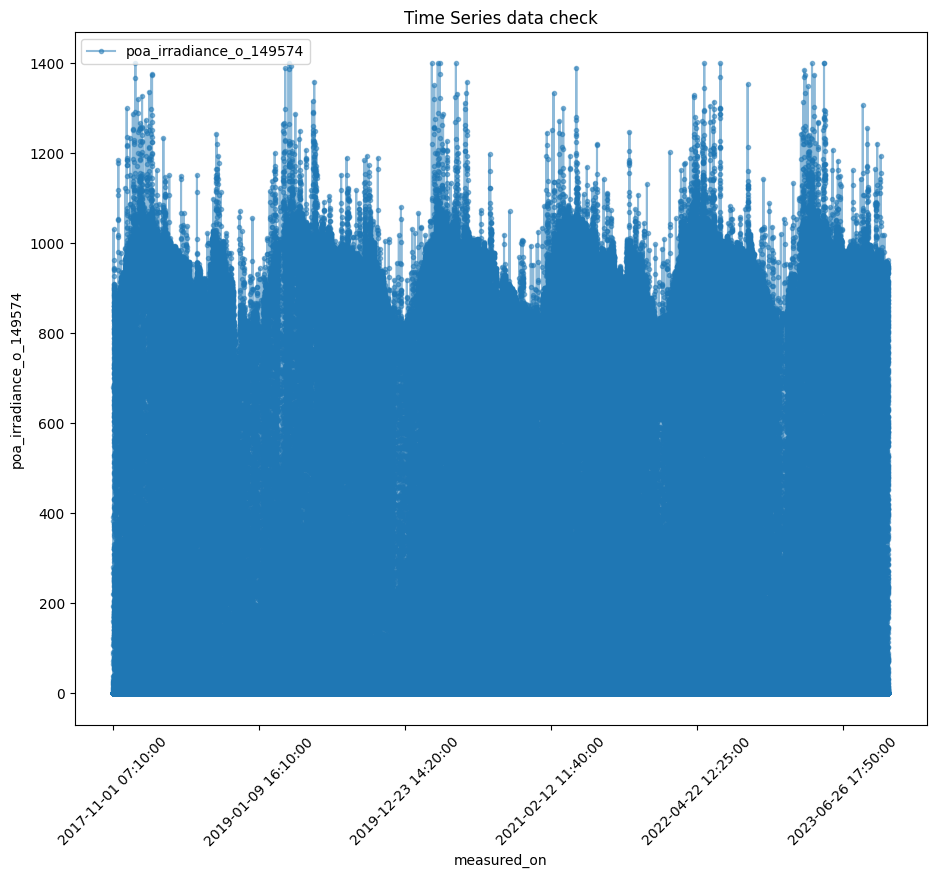

In [5]:
import matplotlib.pyplot as plt

#Set the plot values
plot_cols = ['poa_irradiance_o_149574']

# Add labels and title
axes = df[plot_cols].plot(marker='.', alpha=0.5, figsize=(11, 9))
#Rotate labels               
plt.xticks(rotation=45)    
# Show the plot
plt.xlabel('measured_on')
plt.ylabel('poa_irradiance_o_149574')
plt.title('Time Series data check')
plt.show()